In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io

In [2]:
DATA_PATH = '/Users/sowmyak/my_stuff/widsdatathon2019'

In [3]:
catalog = pd.read_csv(DATA_PATH + '/traininglabels.csv')

In [18]:
def get_num_from_index(index):
    """Get 9 digit number corresponding to input index"""
    str_index = str(index)
    assert len(str_index) < 9, "# digits must be less tahn 9"
    zeros_to_add = 9 - len(str_index)
    num = '0'*zeros_to_add + str_index
    return num


def load_training_image(index):
    """Returns RGB image corresonding to input index"""
    num = get_num_from_index(index)
    filename = DATA_PATH + f'/train_images/img_{num}.jpg'
    image = skimage.io.imread(filename)
    
def load_training_image(cat, index):
    """Returns RGB image corresonding to input index"""
    name = cat['image_id'][index]
    filename = DATA_PATH + '/train_images/' + name
    image = skimage.io.imread(filename)
    return image

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [25]:
len(positive), len(catalog)

(942, 15244)

<IPython.core.display.Javascript object>


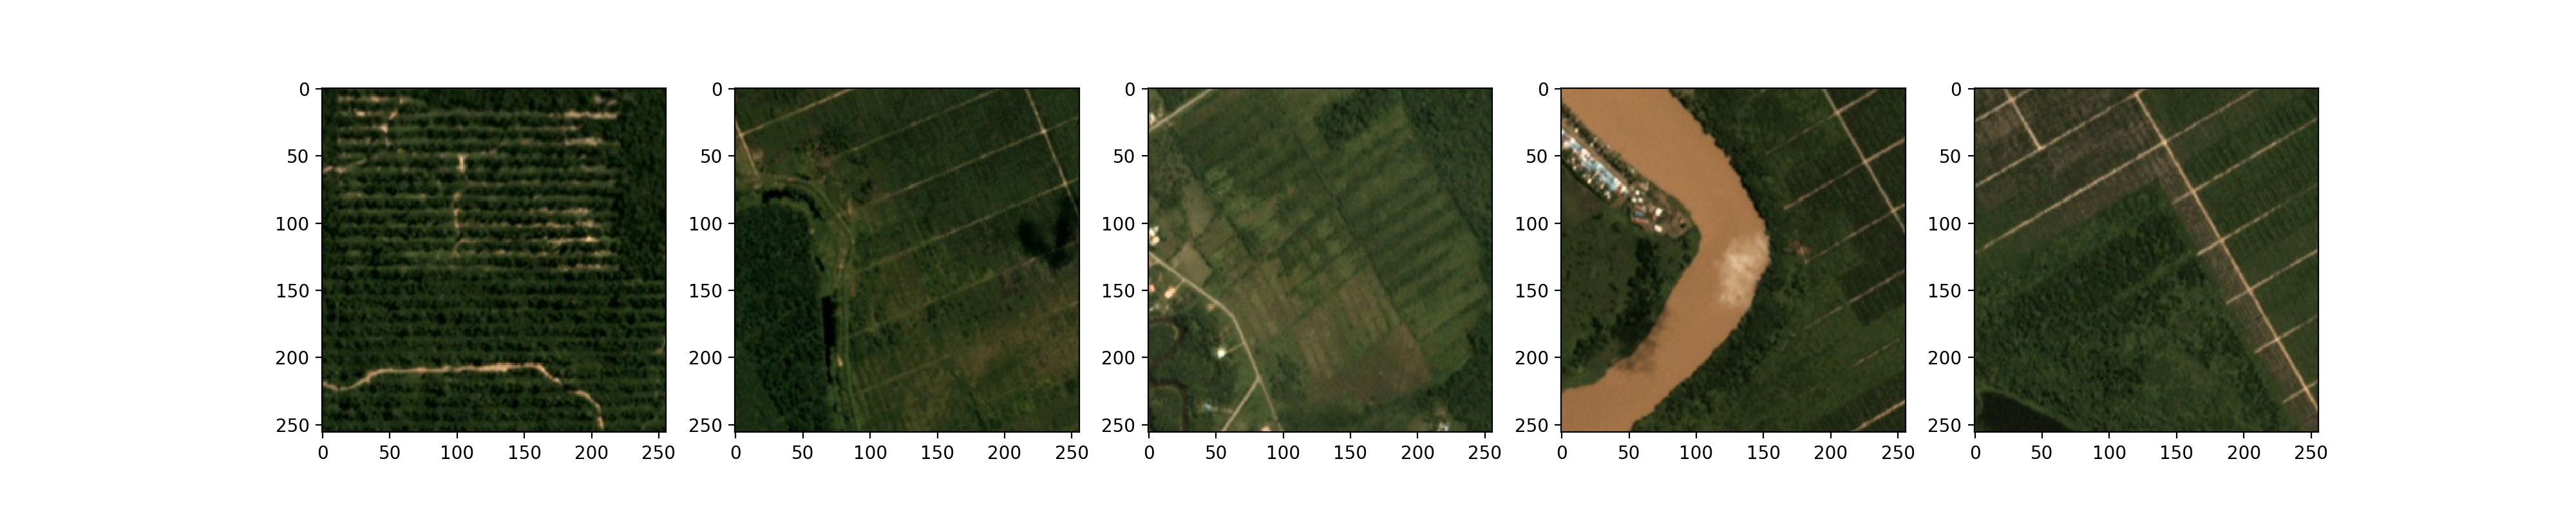

In [22]:
num=5
positive, = np.where(catalog['has_oilpalm'] == 1)
picks = np.random.choice(positive, num)
_, ax = plt.subplots(1, num, figsize=(20, 4))
for i, p in enumerate(picks):
    im = load_training_image(catalog, p)
    ax[i].imshow(im)

<IPython.core.display.Javascript object>


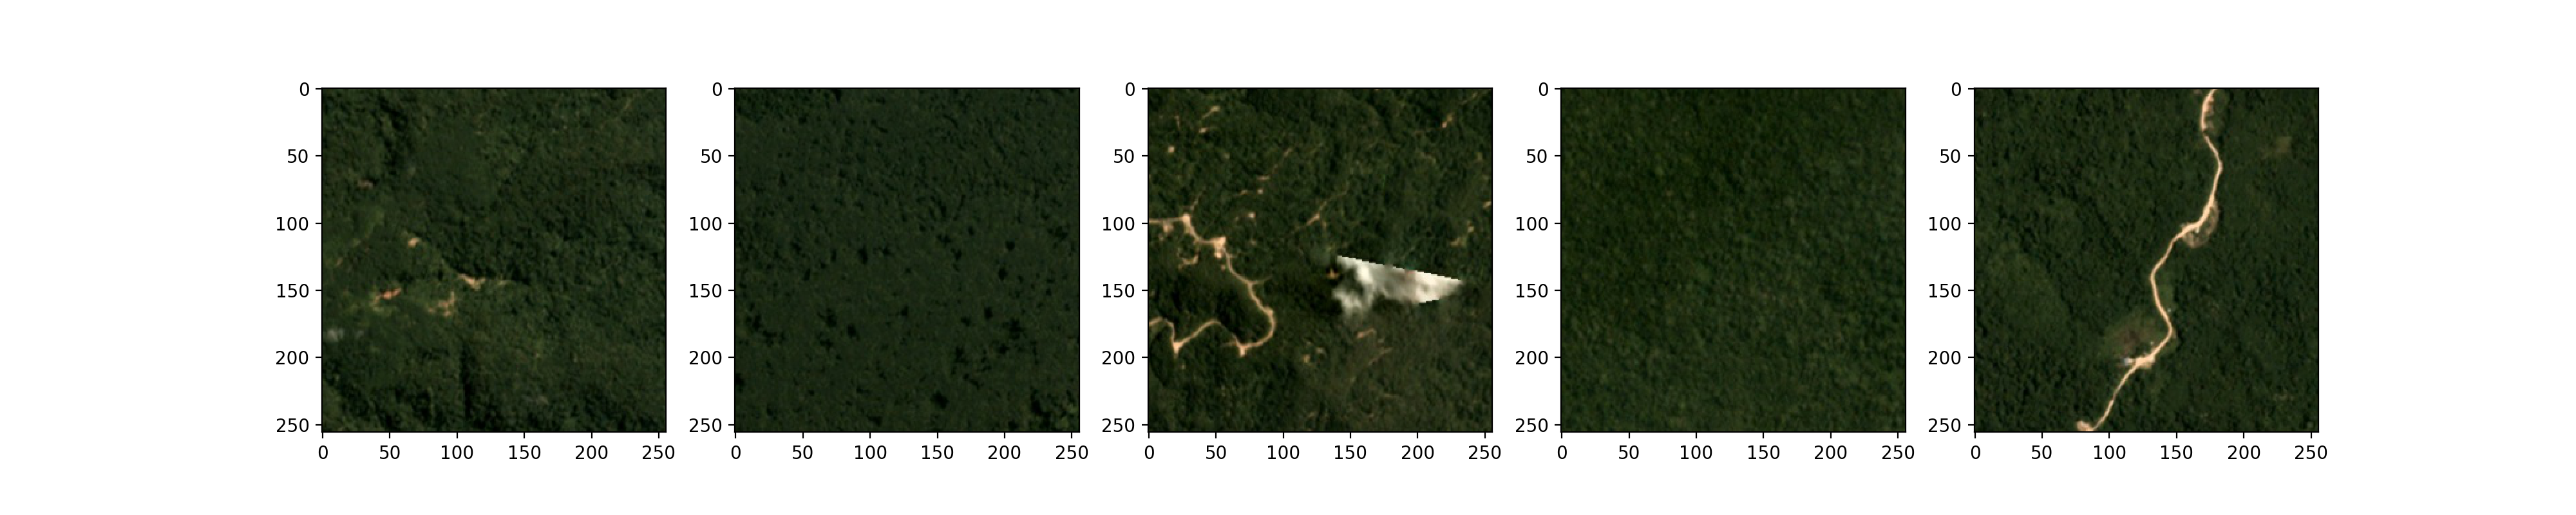

In [27]:
num=5
negative, = np.where(catalog['has_oilpalm'] == 0)
picks = np.random.choice(negative, num)
_, ax = plt.subplots(1, num, figsize=(20, 4))
for i, n in enumerate(picks):
    im = load_training_image(catalog, n)
    ax[i].imshow(im)